# 결정트리와 랜덤 포레스트

In [58]:
from preamble import *

## 결정트리
- 장점 : 전처리에 민감하지 않음
- 단점 : 과대적합에 취약

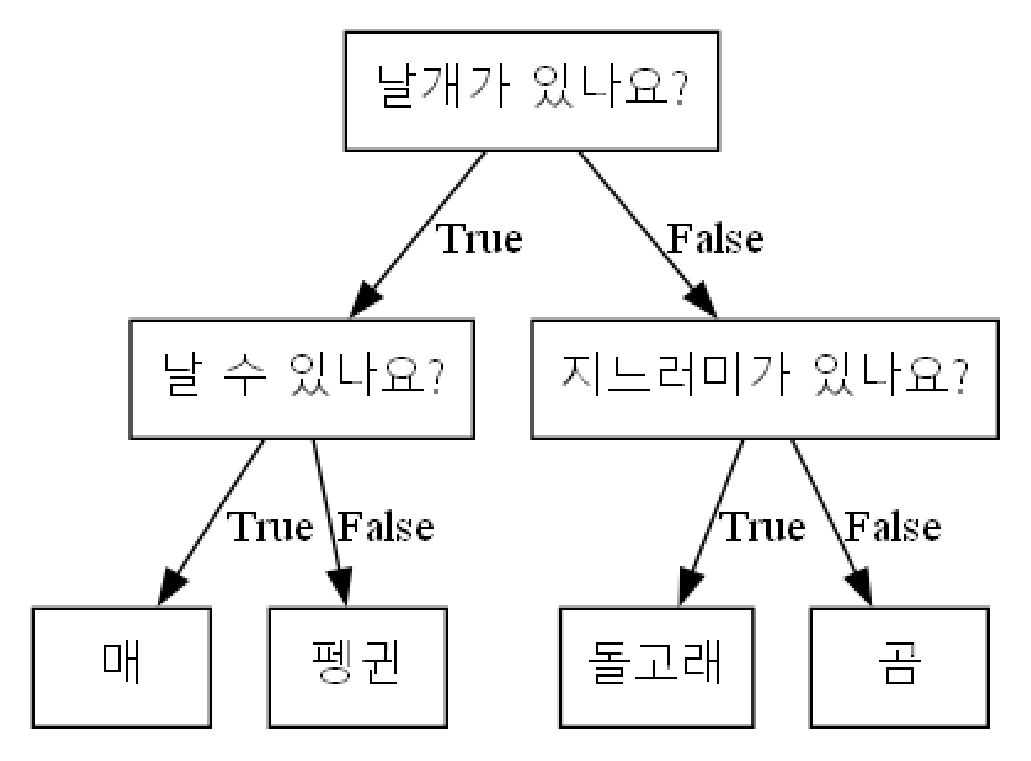

In [59]:
# 결정트리 예제
# 결정트리 과정을 시각적으로 보여줌
mglearn.plots.plot_animal_tree()

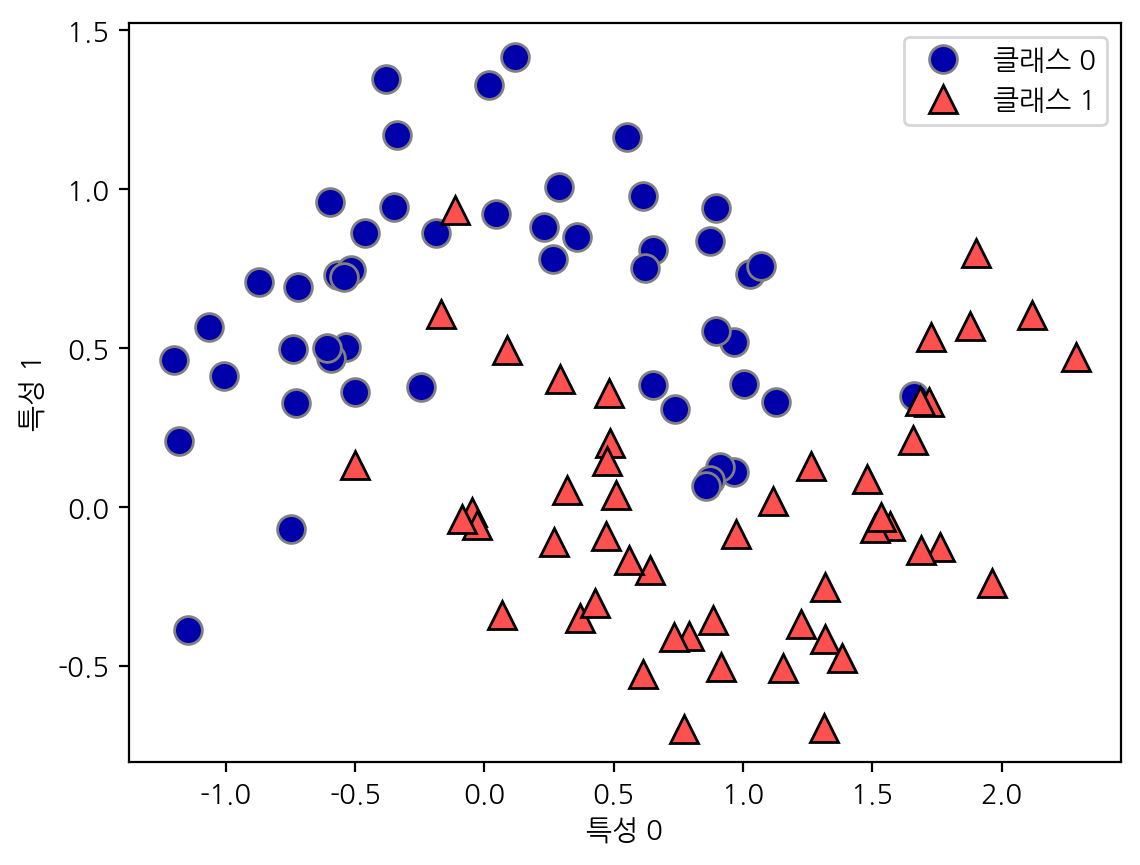

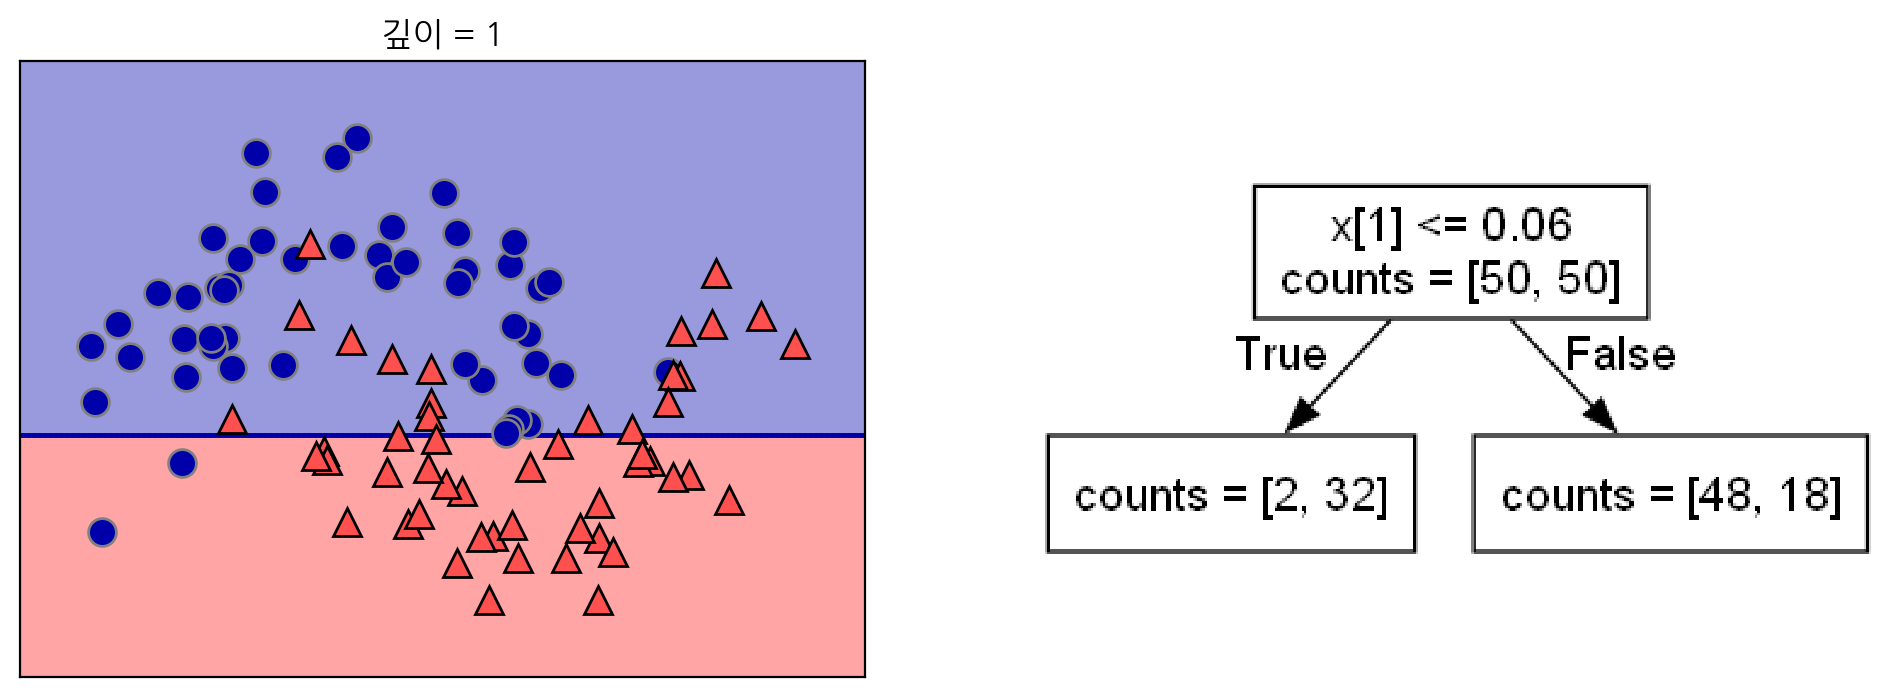

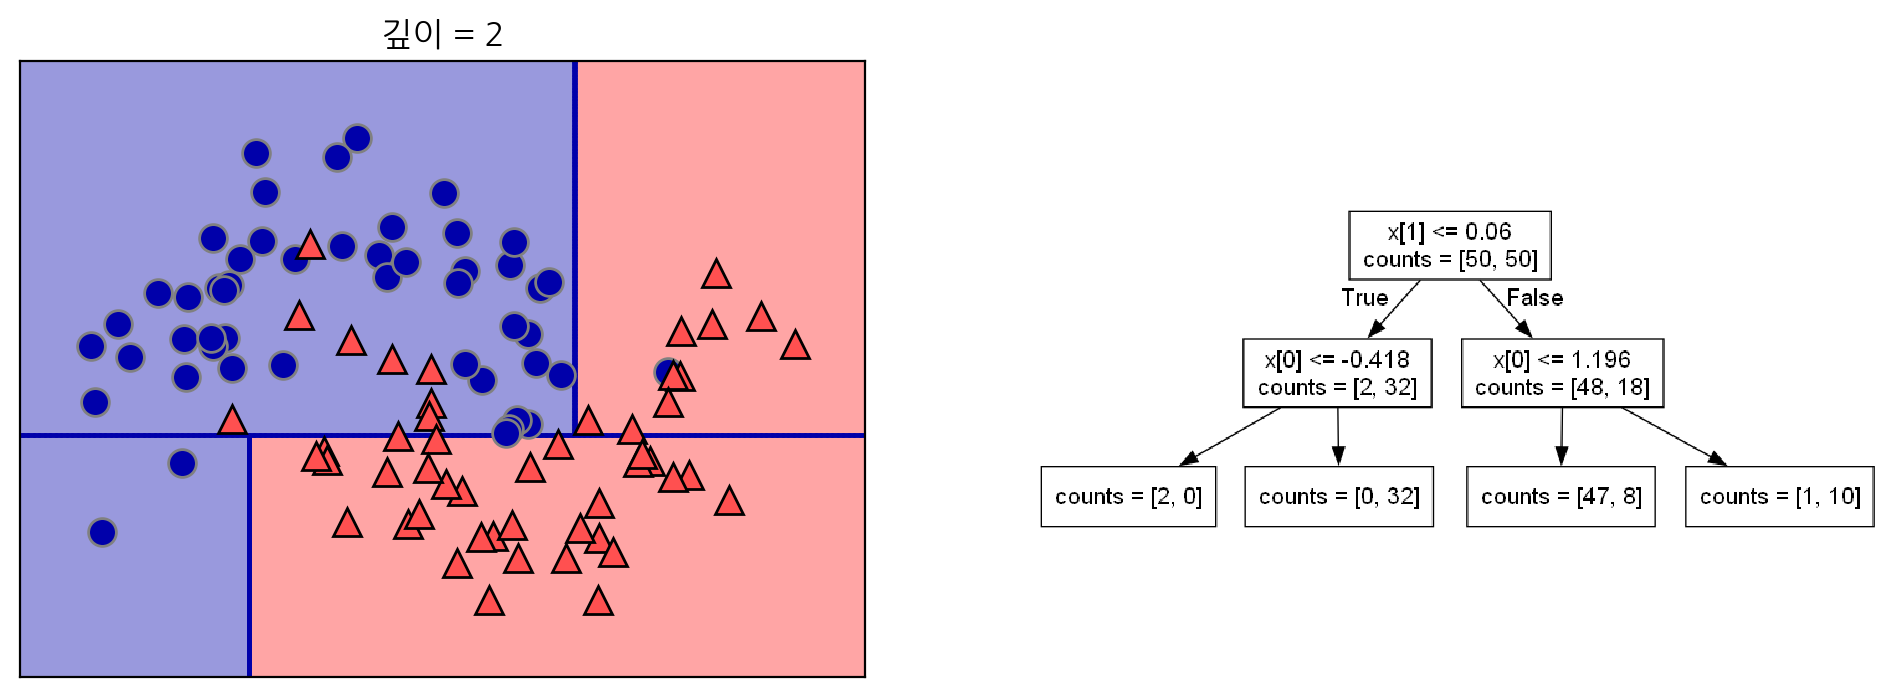

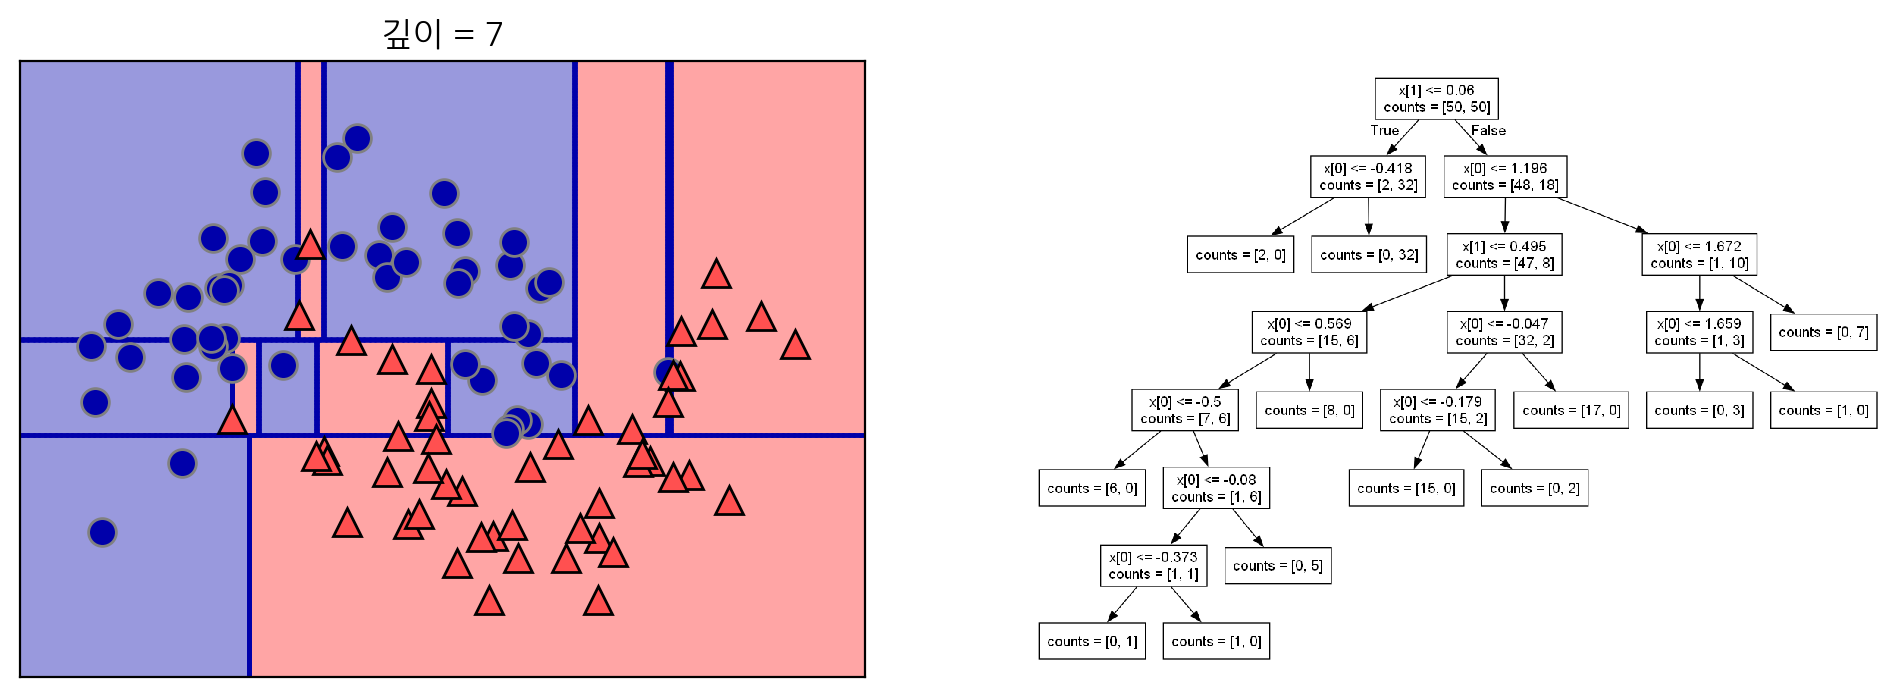

In [60]:
mglearn.plots.plot_tree_progressive()

### 일반적인 결정트리 학습

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    stratify=cancer.target, # 균질하지 않은 데이터를 층으로 나눠줌
                                                    random_state=42)

tree = DecisionTreeClassifier(max_depth=4, random_state=42) # 하이퍼파라미터 설정 잘하기
tree.fit(X_train, y_train)
print(tree.score(X_train, y_train), tree.score(X_test, y_test))

0.9882629107981221 0.9440559440559441


### 결정트리 시각화

In [62]:
from sklearn.tree import export_graphviz
export_graphviz(tree, 
                out_file="tree.dot", 
                class_names=["악성","양성"],
                feature_names=cancer.feature_names, 
                impurity=False, 
                filled=True)

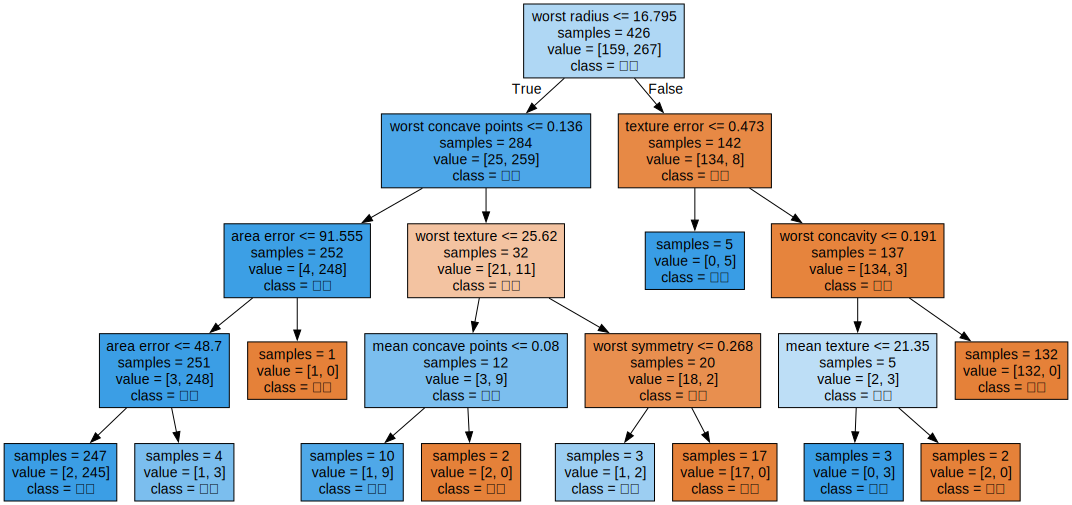

In [63]:
import graphviz
with open("tree.dot", encoding="UTF-8") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph)) # 그래프의 값들로 보고서 작성

### 특성 중요도

In [64]:
def plot_feat_importances(model):
    n_feat = cancer.data.shape[1]
    plt.barh(np.arange(n_feat), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_feat), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_feat)

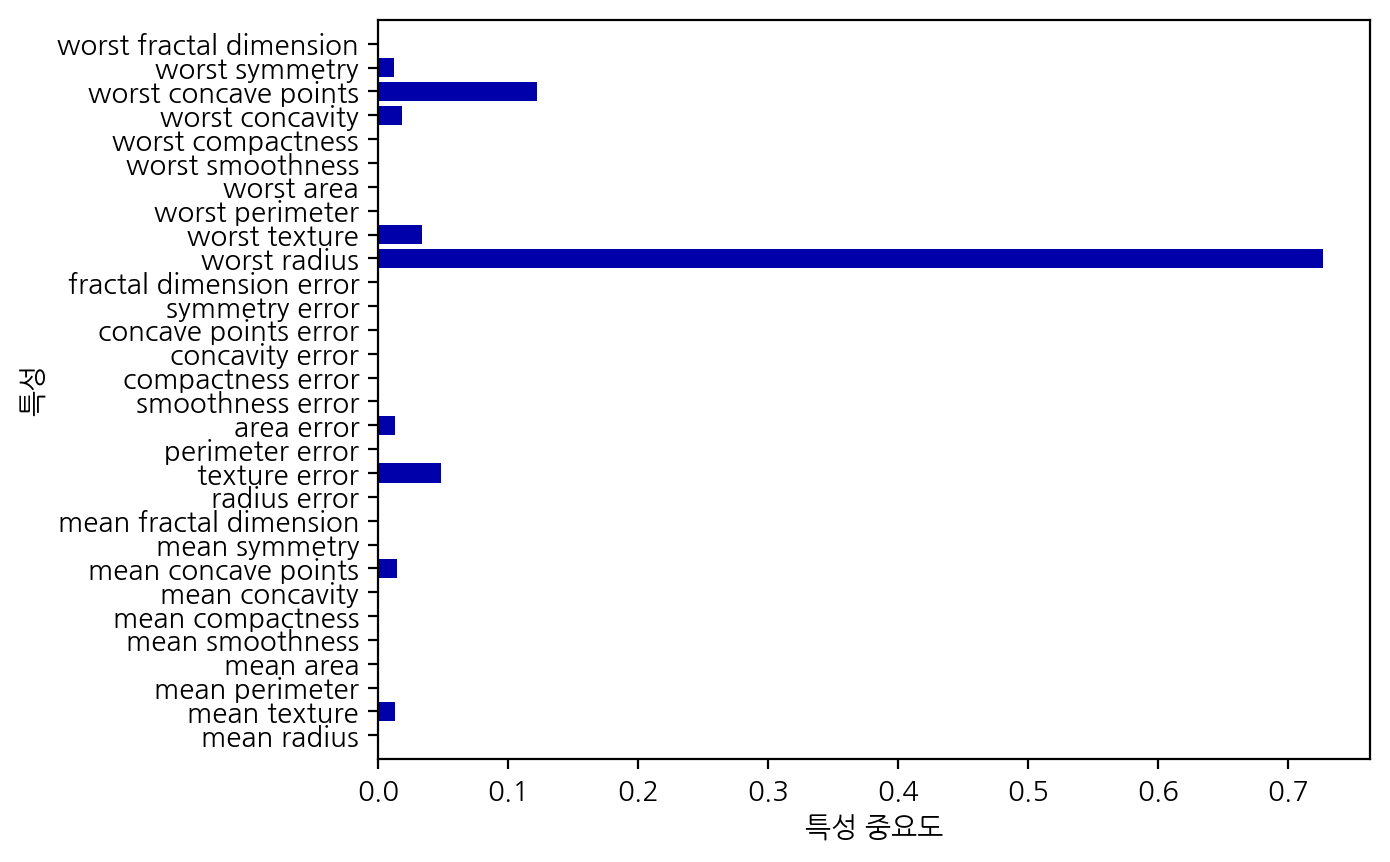

In [65]:
plot_feat_importances(tree) # 과대 적합 문제가 나타난다는 것을 알 수 있다

In [66]:
tree.feature_importances_

array([0.   , 0.013, 0.   , 0.   , 0.   , 0.   , 0.   , 0.014, 0.   ,
       0.   , 0.   , 0.048, 0.   , 0.013, 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.727, 0.033, 0.   , 0.   , 0.   , 0.   , 0.018,
       0.122, 0.012, 0.   ])

## 랜덤 포레스트

In [67]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    stratify=cancer.target, # 균질하지 않은 데이터를 층으로 나눠줌
                                                    random_state=42)

rfc = RandomForestClassifier(n_estimators=100, random_state=42) # 결정트리르 100개를 ML 함, 평균치의 값을 계산
rfc.fit(X_train, y_train)
print(rfc.score(X_train, y_train), rfc.score(X_test, y_test))

1.0 0.958041958041958


In [68]:
from sklearn.tree import export_graphviz

# 예측기 1개를 선택
# TODO: forest 전체값으로 변경
# 
for tree in rfc.estimators_:
    print(tree)
    export_tree = export_graphviz(tree, # 100개의 트리 출력
                                  out_file=None,
                                  special_characters=True,
                                  rotate=True,
                                  precision=1,
                                  filled=True)
    # display(graphviz.Source(export_tree))


DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)
DecisionTreeClassifier(max_features='sqrt', random_state=1273642419)
DecisionTreeClassifier(max_features='sqrt', random_state=1935803228)
DecisionTreeClassifier(max_features='sqrt', random_state=787846414)
DecisionTreeClassifier(max_features='sqrt', random_state=996406378)
DecisionTreeClassifier(max_features='sqrt', random_state=1201263687)
DecisionTreeClassifier(max_features='sqrt', random_state=423734972)
DecisionTreeClassifier(max_features='sqrt', random_state=415968276)
DecisionTreeClassifier(max_features='sqrt', random_state=670094950)
DecisionTreeClassifier(max_features='sqrt', random_state=1914837113)
DecisionTreeClassifier(max_features='sqrt', random_state=669991378)
DecisionTreeClassifier(max_features='sqrt', random_state=429389014)
DecisionTreeClassifier(max_features='sqrt', random_state=249467210)
DecisionTreeClassifier(max_features='sqrt', random_state=1972458954)
DecisionTreeClassifier(max_features='sqrt'

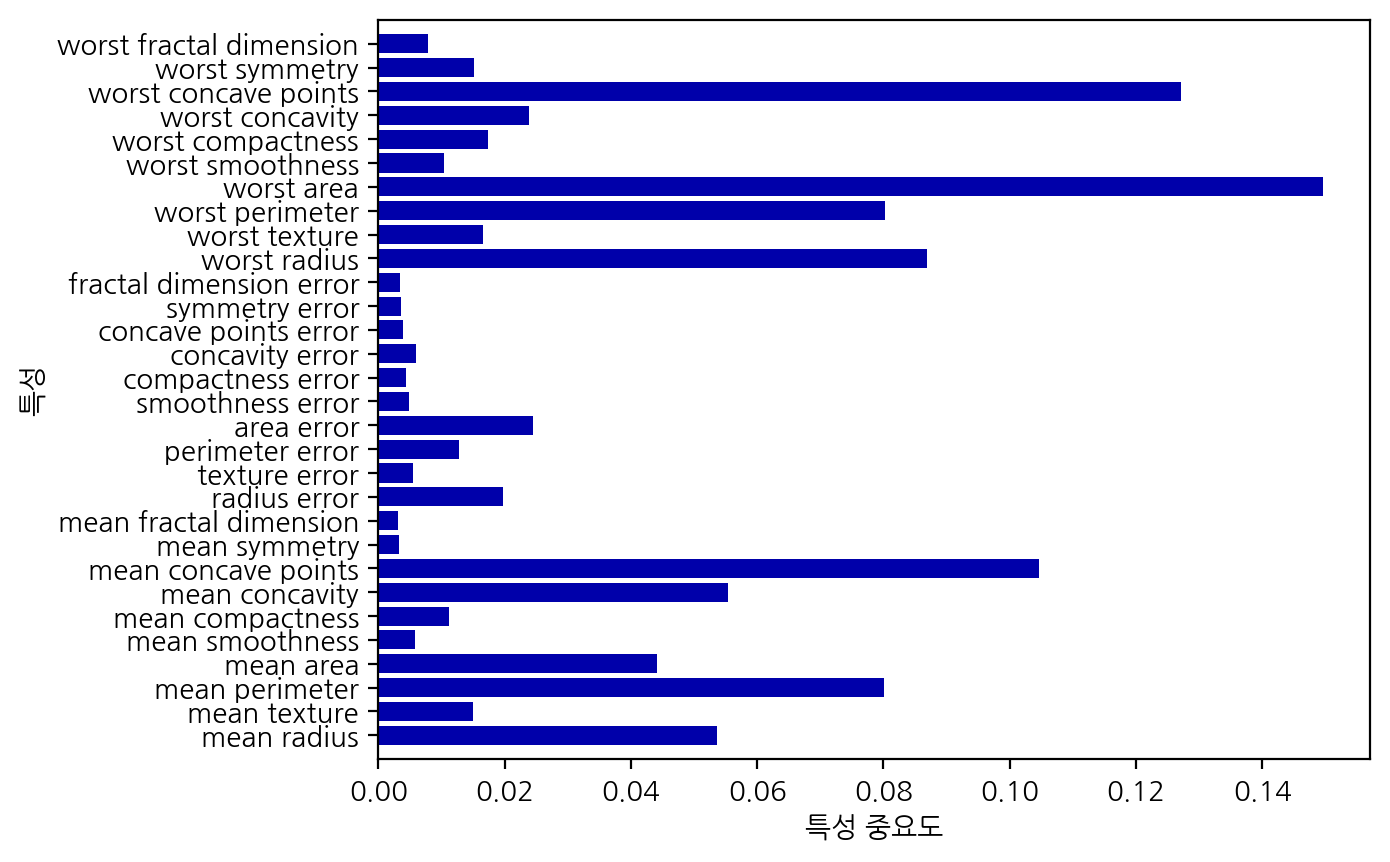

In [69]:
plot_feat_importances(rfc)

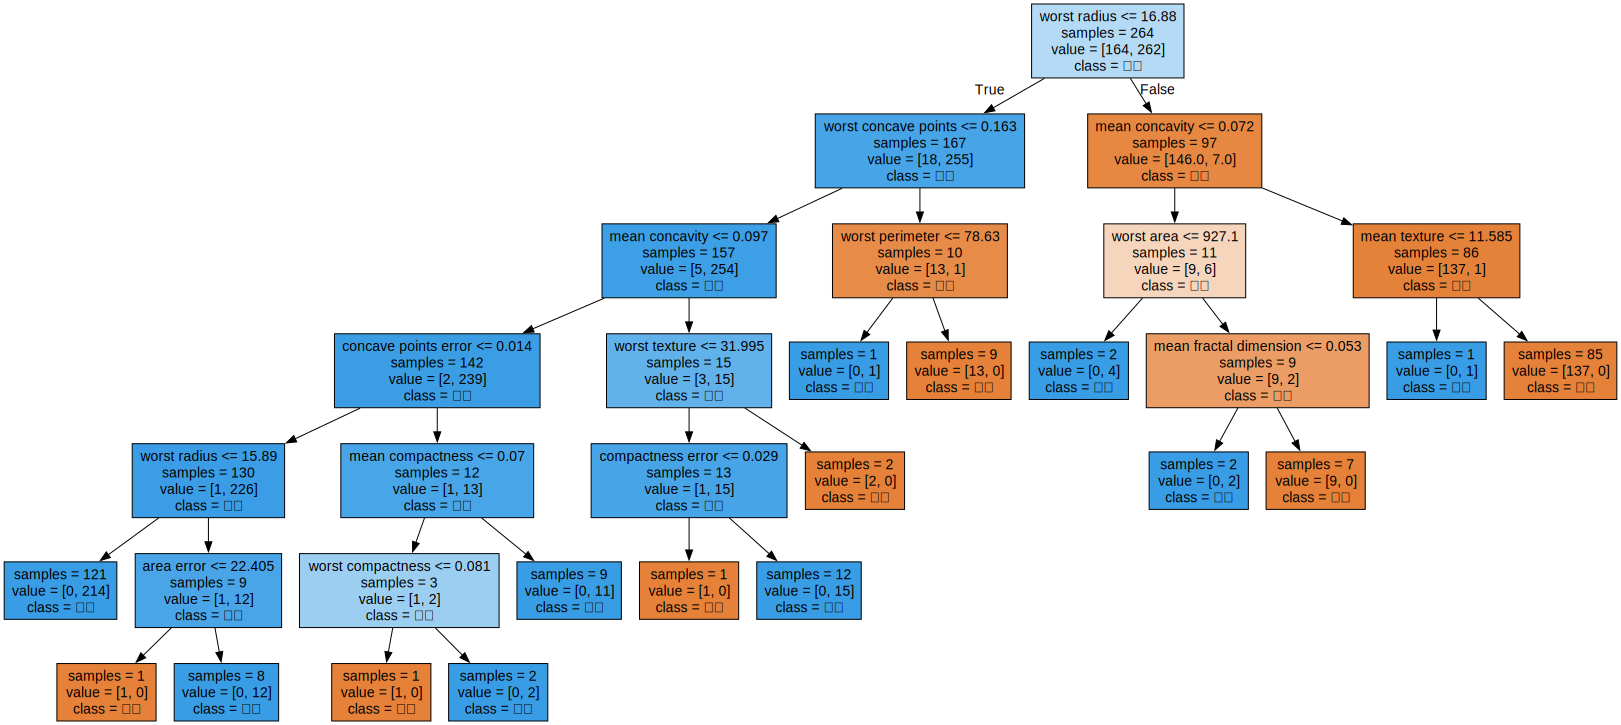

In [70]:
import graphviz
with open("forest.dot", encoding="utf-8") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

## SVM

> 2차원 이상의 결정 방정식의 -> 차원 축소가 필요(ex.PCA)
> 3차원 이상의 ML 데이터는 도식화를 할 수 없음
> 차수를 늘리면 공간을 분할 가능(디테일하게 분류 가능) -> SVM
> 연산력과 설명력이 떨어짐 -> 커널 서포트 벡터 머신(선형성의 특성을 제곱or곱해서 추가함)(중간 규모의 데이터셋을 잘 표현)
> 데이터가 휘어지는 특성을 가짐(주로 포물선의 데이터세트ex. 구기종목 공 포물선 데이터세트)
> 핵심 : 어떻게 제곱or곱하냐의 문제
> 선형적인 데이터셋트일 경우 100% 값이 출력, 선형 ML Base에서 같이 사용하여 데이터 셋의 경향성 파악
> SVM -> 차수 증가 -> 발산! -> Min_Scale, Max_Scale 특성 값의 범위가 비슷해지도록 조정

In [71]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    stratify=cancer.target, # 균질하지 않은 데이터를 층으로 나눠줌
                                                    random_state=42)

svc = SVC()
svc.fit(X_train, y_train)
print(svc.score(X_train, y_train), svc.score(X_test, y_test)) # 데이터 셋이 선형성을 띔 -> 중요 Factor가 찾기

0.9178403755868545 0.9230769230769231


In [72]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    stratify=cancer.target, # 균질하지 않은 데이터를 층으로 나눠줌
                                                    random_state=42)

# 전처리 직접(분석시에 사용하지 마세요. 3장 참고)
# 3장에서 배운 min/max, normal 등 전처리기 사용
# print(range_on_training)
# [1, 2, 3, 5] - [1, 2, 3, 5] numpy 배열 형태로 계산
min_on_training = X_train.min(axis=0)
range_on_training = (X_train - min_on_training).max(axis=0)
X_train_scaled = (X_train - min_on_training) /range_on_training

min_on_test = X_test.min(axis=0)
range_on_test = (X_test - min_on_test).max(axis=0)
X_test_scaled = (X_test - min_on_test) /range_on_test


svc = SVC()
svc.fit(X_train_scaled, y_train)
print(svc.score(X_train_scaled, y_train), svc.score(X_test_scaled, y_test)) # 데이터 셋이 선형성을 띔 -> 중요 Factor가 찾기

0.9788732394366197 0.972027972027972


## 예제(회귀)

In [73]:
ram_prices = pd.read_csv("data/ram_price.csv", encoding='euc-kr')
ram_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  333 non-null    int64  
 1   date        333 non-null    float64
 2   price       333 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 7.9 KB


### 데이터 시각화

In [74]:
# 안쪽 선 선명하게 보이기
%config InlineBackend.figure_format = 'retina'

Text(0, 0.5, '가격 ($/Mbyte)')

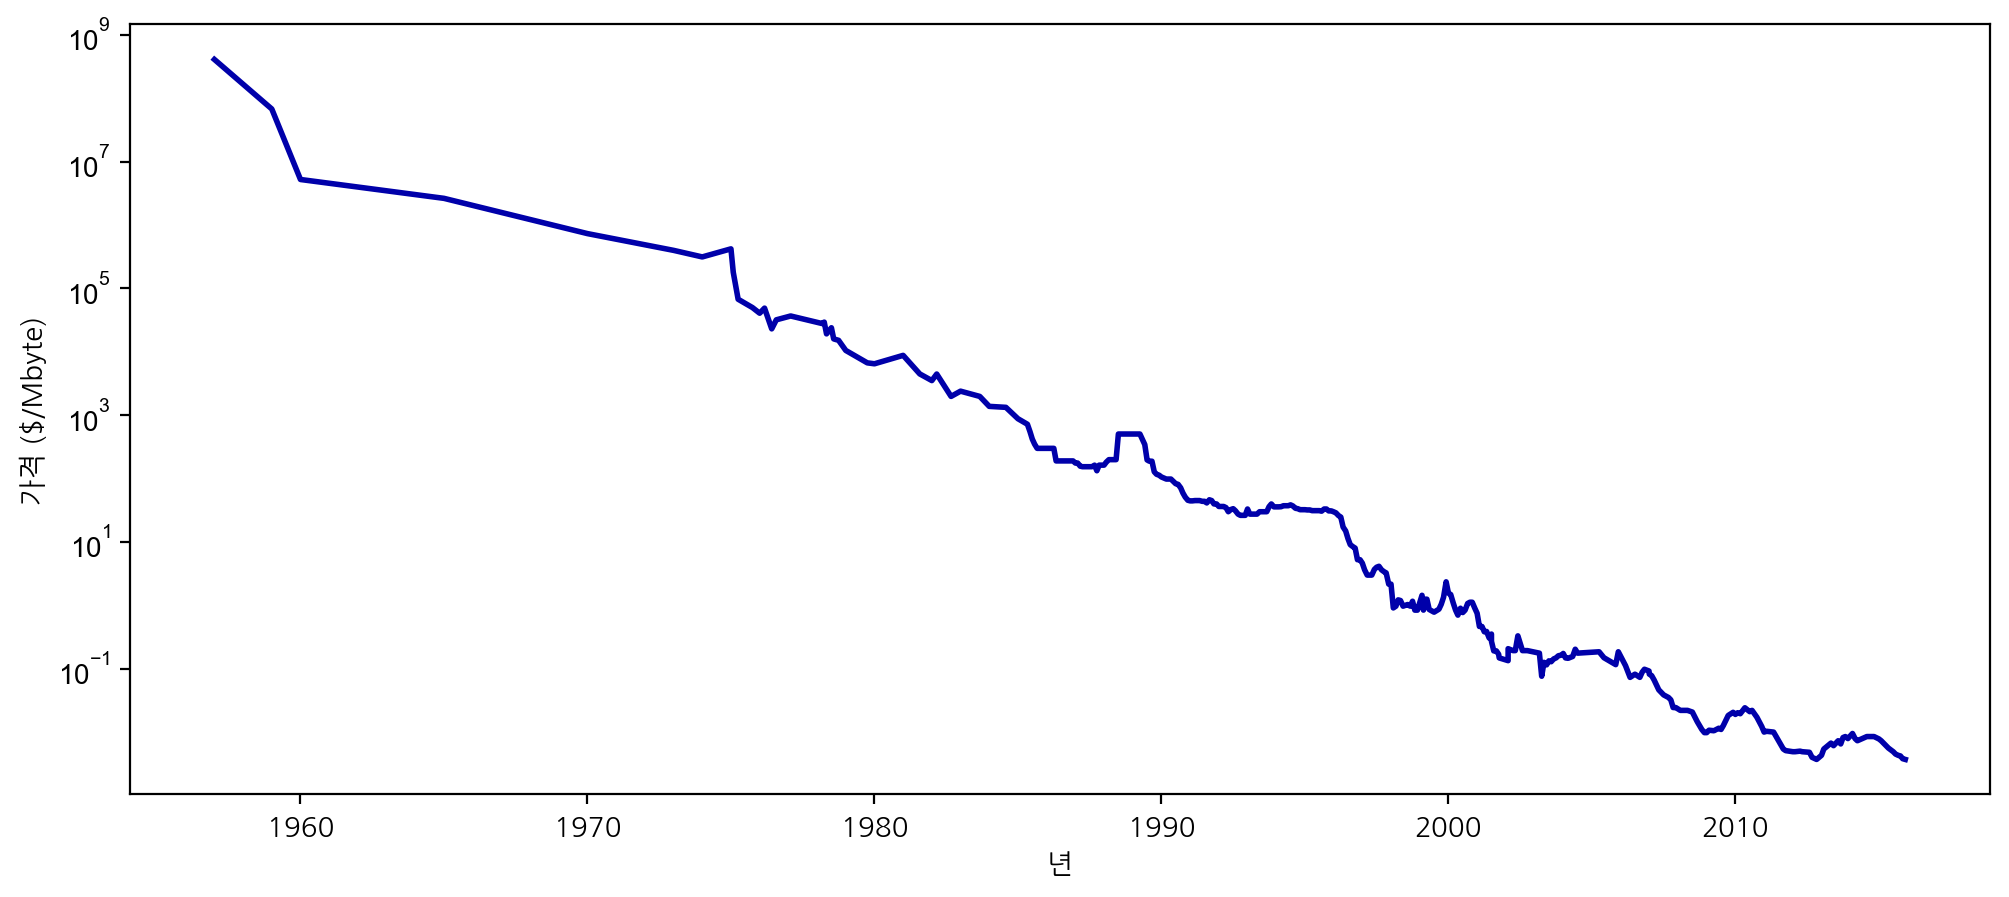

In [75]:
plt.figure(figsize=(12, 5)) # 도화지
plt.yticks(fontname = "Arial") # y 축 점선 폰트 지정
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")

### 데이터 준비

In [76]:
# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듭니다
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만을 이용합니다
X_train = data_train.date.to_numpy()[:, np.newaxis] # 행을 전부다 사용, (컬럼값 숫자로 변환)차원을 따로 만듦
# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꿉니다
y_train = np.log(data_train.price) # 로그 데이터로 변환

## 학습

In [77]:
# 회귀 모델
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)
forest = RandomForestRegressor().fit(X_train, y_train)
svr = SVR().fit(X_train, y_train)

In [78]:
# 예측은 전체 기간에 대해서 수행합니다
X_all = ram_prices.date.to_numpy()[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)
pred_forest = forest.predict(X_all)
pred_svr = svr.predict(X_all)

In [80]:
# 예측한 값의 로그 스케일을 되돌립니다
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)
price_forest = np.exp(pred_forest)
price_svr = np.exp(pred_svr)

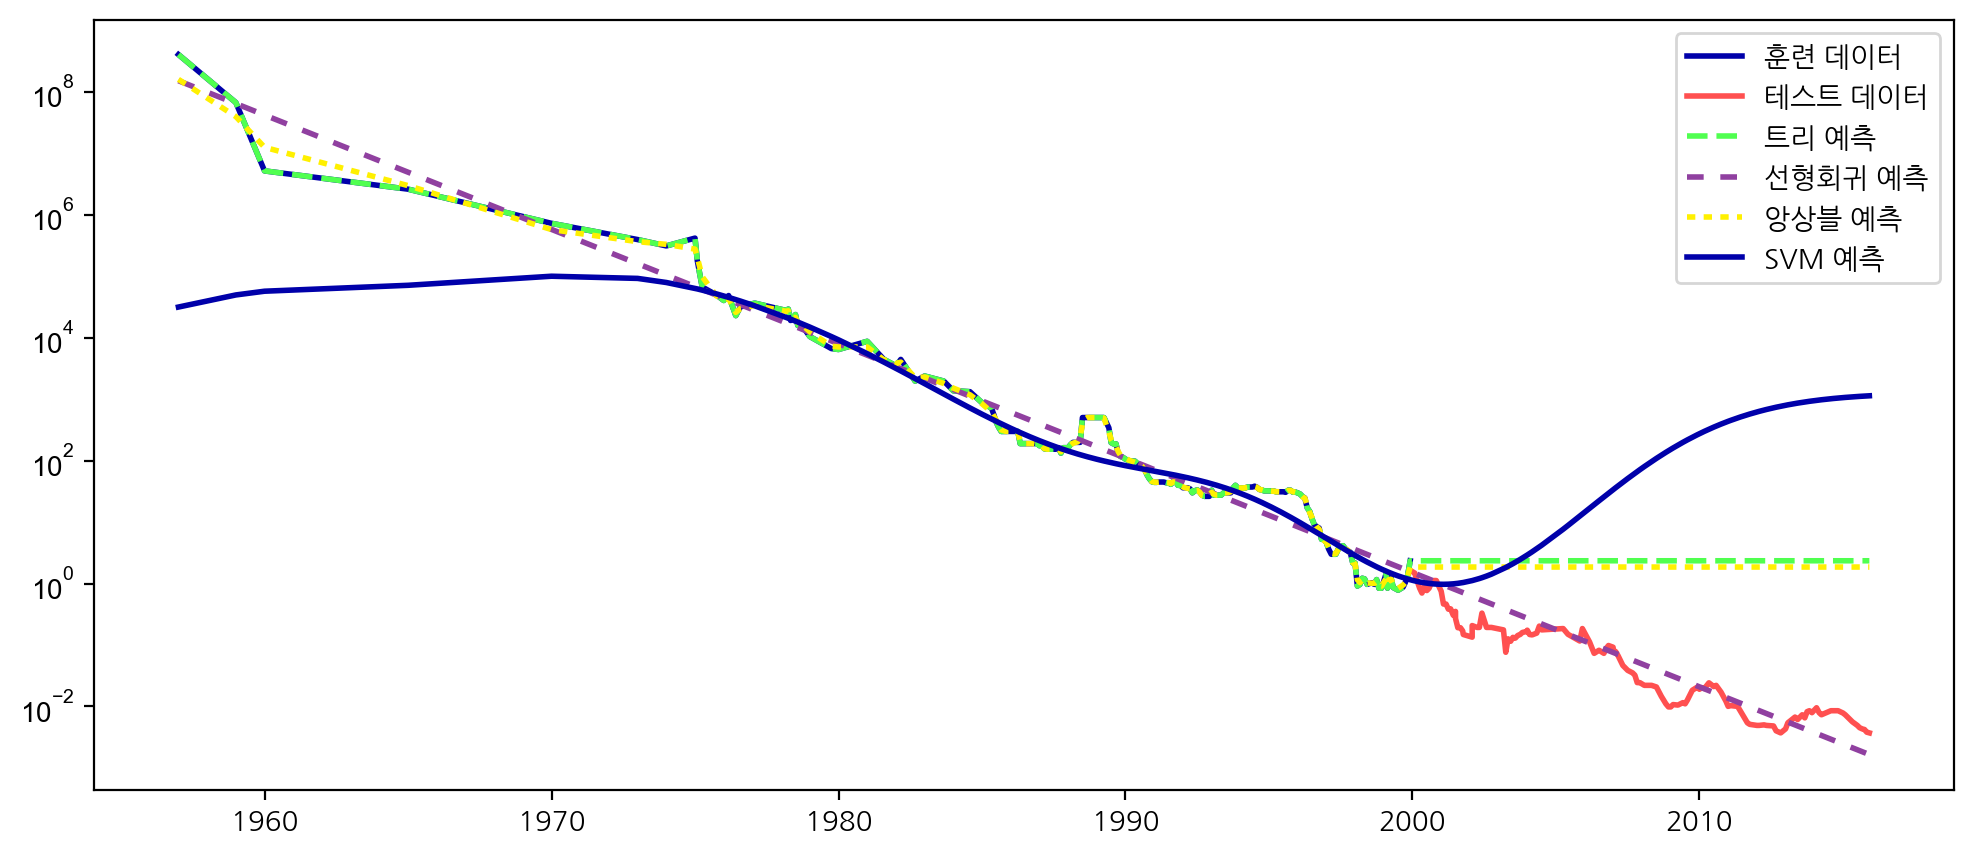

In [81]:
plt.figure(figsize=(12, 5)) # 도화지
plt.yticks(fontname = "Arial")
plt.semilogy(data_train.date, data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, label="트리 예측") # 가장 큰 단점 2000년 이후의 데이터가 없어 예측하지 못함
plt.semilogy(ram_prices.date, price_lr, label="선형회귀 예측")
plt.semilogy(ram_prices.date, price_forest, label="앙상블 예측")
plt.semilogy(ram_prices.date, price_svr, label="SVM 예측")
plt.legend()

## 딥러닝(XOR 문제를 해결하자 v1)

- XOR = AND, OR, NOT 게이트로 구성
- XOR(배타적 논리합) 문제를 해결하지 못해서 나옴

In [ ]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = w1 * x1 + w2 * x2 # 직선 방정식, 논리식 계산
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [ ]:
print(AND(0, 0), AND(0, 1), AND(1, 0), AND(1, 1))

0 0 0 1


In [ ]:
def OR(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.2
    tmp = w1 * x1 + w2 * x2 # 직선 방정식, 논리식 계산
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [ ]:
print(OR(0, 0), OR(0, 1), OR(1, 0), OR(1, 1))

0 1 1 1


In [ ]:
def NAND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = w1 * x1 + w2 * x2 # 직선 방정식, 논리식 계산
    if tmp > theta:
        return 0
    elif tmp <= theta:
        return 1

In [ ]:
print(NAND(0, 0), NAND(0, 1), NAND(1, 0), NAND(1, 1))

1 1 1 0


In [ ]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)

    y = AND(s1, s2)
    return y

In [ ]:
print(XOR(0, 0), XOR(0, 1), XOR(1, 0), XOR(1, 1))

0 1 1 0
